# Testing production and degradation on ABC

In [1]:
import pints
import pints.toy as toy
import pints.toy.stochastic
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

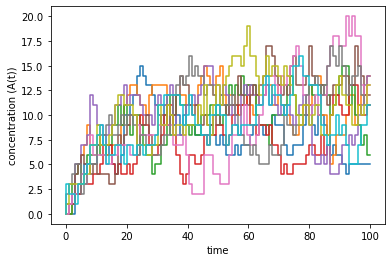

In [2]:
np.random.seed(3)

# Load a forward model
n_0 = 0
model = toy.stochastic.ProductionDegradationModel(n_0)

# Create some toy data
k = [0.1, 1]
times = np.linspace(0, 100, 100)

for i in range(10):
    values = model.simulate(k, times)

    # Create an object with links to the model and time series
    problem = pints.SingleOutputProblem(model, times, values)

    # Create a uniform prior parameter
    log_prior = pints.UniformLogPrior([0.0, 0.5], [0.3, 2])

    # Set the error measure to be used to compare simulated to observed data
    error_measure = pints.RootMeanSquaredError(problem)

    plt.step(times, values)


plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.show()

# Rejection ABC

In [3]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(4)

# set target number of samples
abc.set_n_samples(500)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using Rejection ABC
Running in sequential mode.
Iter. Eval. Acceptance rate Time m:s
1     3      0.333333333      0:00.0
2     13     0.153846154      0:00.0
3     14     0.214285714      0:00.0
20    113    0.17699115       0:00.3
40    209    0.19138756       0:00.6
60    331    0.181268882      0:00.9
80    445    0.179775281      0:01.2
100   602    0.166112957      0:01.7
120   725    0.165517241      0:02.0
140   822    0.170316302      0:02.2
160   929    0.172228202      0:02.6
180   1010   0.178217822      0:02.8
200   1138   0.175746924      0:03.2
220   1303   0.168841136      0:03.6
240   1454   0.165061898      0:04.0
260   1572   0.165394402      0:04.3
280   1678   0.166865316      0:04.6
300   1793   0.167317345      0:04.9
320   1889   0.1694018        0:05.2
340   1983   0.171457388      0:05.5
360   2179   0.165213401      0:06.0
380   2282   0.166520596      0:06.3
400   2387   0.167574361      0:06.6
420   2489   0.168742467      0:07.1
440   2654   0.1

In [11]:
samples_flat = np.array([item for sublist in samples for item in sublist])

# print(samples_flat[:])
plt.hist(samples_flat[:,0], color="blue", label="Samples")
plt.vlines(x=0.1, linestyles='dashed', ymin=0, ymax=400, label="Actual value", color="red")
plt.legend()
plt.show()

TypeError: list indices must be integers or slices, not tuple

ValueError: The 'color' keyword argument must have one color per dataset, but 2 datasets and 1 colors were provided

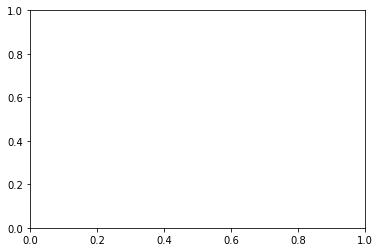

In [5]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=model.suggested_parameters(), linestyles='dashed', ymin=0, ymax=3000, label="Actual value", color="red")
plt.legend()
plt.show()

# PMC Degradation

In [5]:
np.random.seed(3)

abc = pints.ABCController(error_measure, log_prior, method=pints.ABCPMC)

# set the threshold
abc.sampler().set_threshold(10000)

# set target number of samples
# try this
abc.set_n_samples(500)

# setting the number of generations
abc.sampler().set_n_generations(20)

# setting the threshold ratio
abc.sampler().set_t_ratio(0.99)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using PMC ABC
Running in sequential mode.


ValueError: cov must be 2 dimensional and square

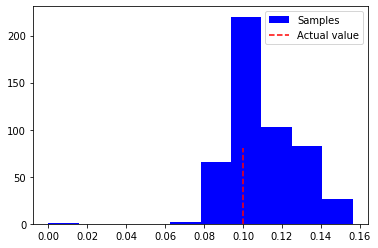

In [14]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=model.suggested_parameters(), linestyles='dashed', ymin=0, ymax=80, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

# ABC SMC

In [22]:
np.random.seed(2)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)
# set initial threshold
abc.sampler().set_threshold_schedule(np.array([9, 6, 4]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(200)

# set target number of samples
abc.set_n_samples(1000)

# log to screen
abc.set_log_to_screen(True)

samples = abc.run()
print("Done")

Using ABC-SMC
Running in sequential mode.
Trying t=1, threshold=6
Trying t=2, threshold=4
Iter. Eval. Acceptance rate Time m:s
1     655    0.00152671756    0:05.0
2     703    0.00284495021    0:05.5
3     717    0.00418410042    0:05.7
20    940    0.0212765957     0:07.9
40    1414   0.0282885431     0:10.5
60    1660   0.0361445783     0:11.5
80    2098   0.0381315539     0:13.0
100   2429   0.0411692054     0:14.1
120   2735   0.0438756856     0:15.2
140   3156   0.0443599493     0:16.7
160   3519   0.0454674623     0:17.9
180   3838   0.0468994268     0:18.7
200   4372   0.0457456542     0:20.1
220   4868   0.0451930978     0:21.5
240   5248   0.0457317073     0:22.6
260   5607   0.0463706082     0:23.6
280   5969   0.04690903       0:24.6
300   6310   0.0475435816     0:25.5
320   6627   0.0482873095     0:26.3
340   7075   0.0480565371     0:27.8
360   7441   0.048380594      0:28.8
380   7742   0.0490829243     0:29.7
400   8077   0.0495233379     0:30.6
420   8370   0.0501792

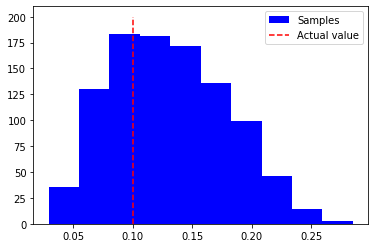

In [26]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=0.1, linestyles='dashed', ymin=0, ymax=200, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()

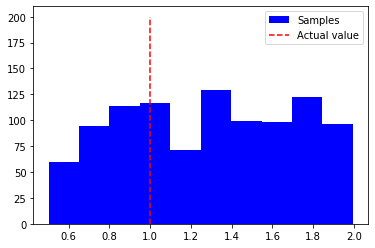

In [27]:
plt.hist(samples[:,1], color="blue", label="Samples")
plt.vlines(x=1, linestyles='dashed', ymin=0, ymax=200, label="Actual value", color="red")
# plt.plot(thetas, true_prob, label="posterior")
plt.legend()
plt.show()